# Business Objective: You are tasked to train an ML model to predict the selling price of an HDB resale flat based on its characteristics 

# Import

In [2]:
import pandas as pd
from pycaret.classification import setup

# Read the CSV file using Pandas
csv_file_path = r"\MLOPS\data\raw\01_hdb_resale_transactions.csv"
data = pd.read_csv(csv_file_path)

data

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,174,ANG MO KIO AVENUE 4,ANG MO KIO,560174,2015-01,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,1.375097,103.837619,10296.855750,1096.947897
1,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,1.373922,103.855621,10065.227930,847.235690
2,163,ANG MO KIO AVENUE 4,ANG MO KIO,560163,2015-01,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,1.373552,103.838169,10118.831550,1176.742184
3,446,ANG MO KIO AVENUE 10,ANG MO KIO,560446,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,1.367761,103.855357,9383.300907,682.205473
4,557,ANG MO KIO AVENUE 10,ANG MO KIO,560557,2015-01,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,1.371626,103.857736,9825.917255,953.047695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194235,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563
194236,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563
194237,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165
194238,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561


# Exploratory Data Analysis

 ### checking if there is any null values

In [3]:
for column in data.columns:
    null_present = data[column].isnull().any()
    if null_present:
        print(f"Column '{column}' has null values.")
    else:
        print(f"Column '{column}' has no null values.")

Column 'block' has no null values.
Column 'street_name' has no null values.
Column 'town' has no null values.
Column 'postal_code' has no null values.
Column 'month' has no null values.
Column 'flat_type' has no null values.
Column 'storey_range' has no null values.
Column 'floor_area_sqm' has no null values.
Column 'flat_model' has no null values.
Column 'lease_commence_date' has no null values.
Column 'resale_price' has no null values.
Column 'latitude' has no null values.
Column 'longitude' has no null values.
Column 'cbd_dist' has no null values.
Column 'min_dist_mrt' has no null values.


In [4]:
data['flat_type'].value_counts()

4 ROOM              81114
5 ROOM              48332
3 ROOM              46951
EXECUTIVE           14820
2 ROOM               2870
MULTI-GENERATION       78
1 ROOM                 75
Name: flat_type, dtype: int64

In [5]:
# Assuming data['flat_type'].value_counts() outputs the value counts
flat_type_counts = data['flat_type'].value_counts()

# Create a list of tuples containing (value, count) pairs
flat_type_value_counts = [(value, count) for value, count in zip(flat_type_counts.index, flat_type_counts.values)]

print("Flat Type Value Counts:", flat_type_value_counts)

Flat Type Value Counts: [('4 ROOM', 81114), ('5 ROOM', 48332), ('3 ROOM', 46951), ('EXECUTIVE', 14820), ('2 ROOM', 2870), ('MULTI-GENERATION', 78), ('1 ROOM', 75)]


# Finding out how many flat types are there and its count

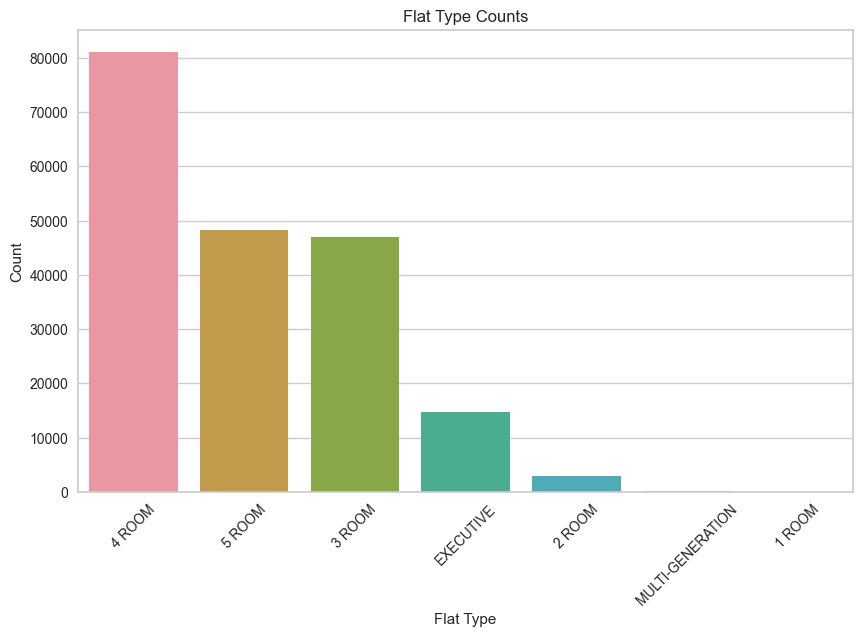

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=[value for value, nouse in flat_type_value_counts], y=[count for nouse, count in flat_type_value_counts])
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.title('Flat Type Counts')
plt.xticks(rotation=45)
plt.show()

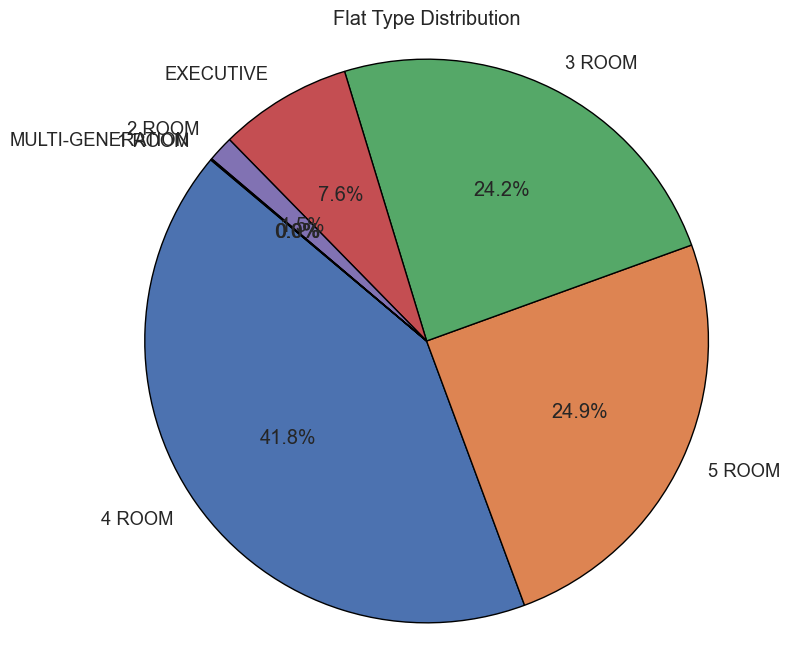

In [7]:
df = pd.DataFrame(flat_type_value_counts, columns=['Flat Type', 'Count'])

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
sns.set(font_scale=1.2)
plt.pie(df['Count'], labels=df['Flat Type'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Flat Type Distribution')
plt.axis('equal')
plt.show()

## The Pie chart shows that majority of the room type in Singapore is 4 Room with 41.8%

### but what about flat model?

In [8]:

data['flat_model'].value_counts()

Model A                   64528
Improved                  48510
New Generation            26023
Premium Apartment         21535
Simplified                 7987
Apartment                  7439
Maisonette                 5591
Standard                   5567
DBSS                       2978
Model A2                   2375
Type S1                     414
Model A-Maisonette          358
Adjoined flat               328
Type S2                     207
Terrace                     114
Premium Apartment Loft      100
Multi Generation             78
2-room                       53
Improved-Maisonette          26
Premium Maisonette           16
3Gen                         13
Name: flat_model, dtype: int64

In [9]:
# Assuming data['flat_type'].value_counts() outputs the value counts
flat_modelcounts = data['flat_model'].value_counts()

# Create a list of tuples containing (value, count) pairs
flat_model_value_counts = [(value, count) for value, count in zip(flat_modelcounts.index, flat_modelcounts.values)]
df = pd.DataFrame(flat_model_value_counts, columns=['Flat Model', 'Count'])

In [10]:
df

,Flat Model,Count
0,Model A,64528
1,Improved,48510
2,New Generation,26023
3,Premium Apartment,21535
4,Simplified,7987
5,Apartment,7439
6,Maisonette,5591
7,Standard,5567
8,DBSS,2978
9,Model A2,2375


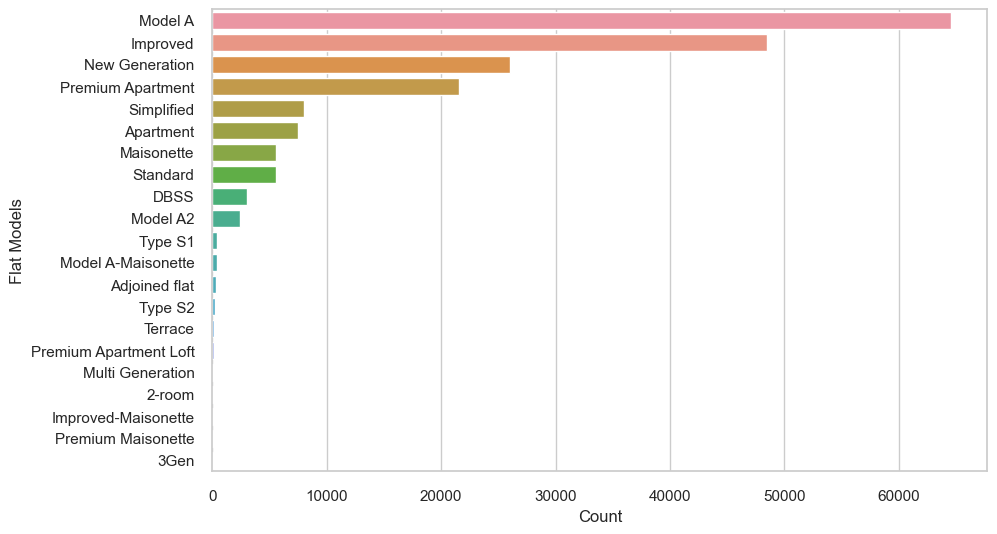

In [11]:
# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Count', y='Flat Model', data=df)
plt.xlabel('Count')
plt.ylabel('Flat Models')
plt.show()

# How About the Floor Level?

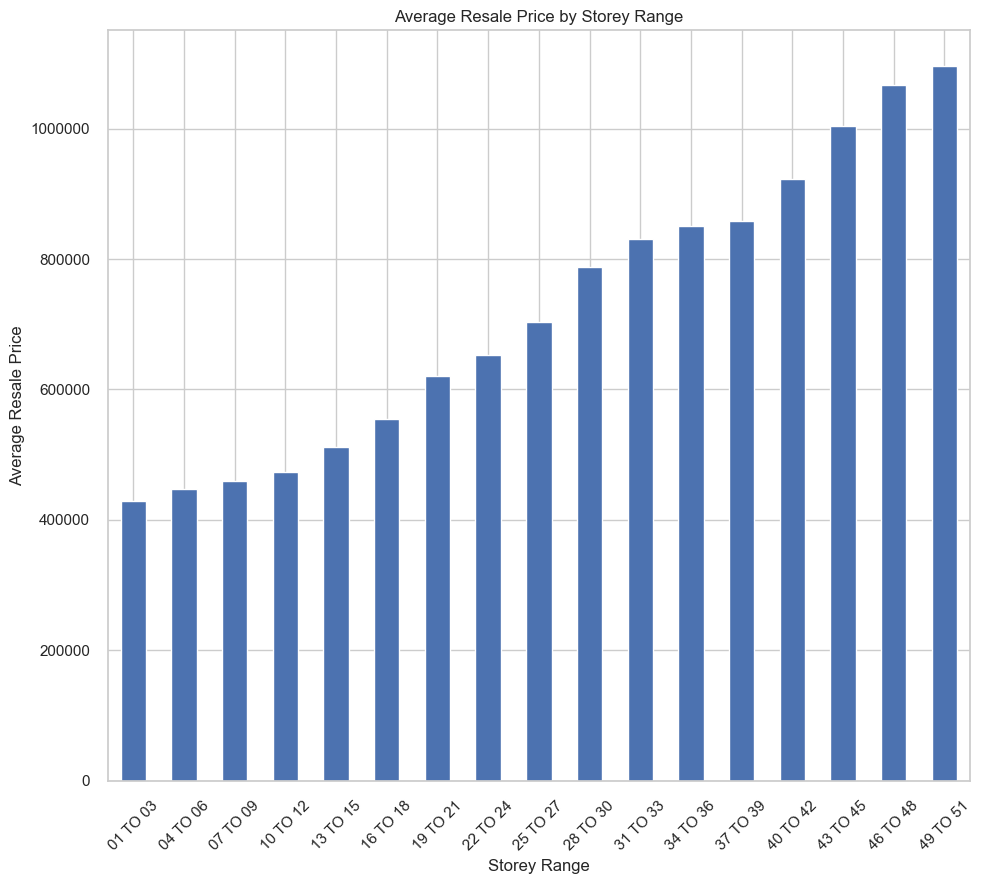

In [12]:
storey_avg_price = data.groupby('storey_range')['resale_price'].mean()

# Visualization
plt.figure(figsize=(10, 9))
storey_avg_price.plot(kind='bar')
plt.xlabel('Storey Range')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price by Storey Range')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Town affecting resale prices?

In [13]:
data['town_flat'] = data['town'] + ' - ' + data['flat_type']

In [14]:
data

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt,town_flat
0,174,ANG MO KIO AVENUE 4,ANG MO KIO,560174,2015-01,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,1.375097,103.837619,10296.855750,1096.947897,ANG MO KIO - 3 ROOM
1,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,1.373922,103.855621,10065.227930,847.235690,ANG MO KIO - 3 ROOM
2,163,ANG MO KIO AVENUE 4,ANG MO KIO,560163,2015-01,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,1.373552,103.838169,10118.831550,1176.742184,ANG MO KIO - 3 ROOM
3,446,ANG MO KIO AVENUE 10,ANG MO KIO,560446,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,1.367761,103.855357,9383.300907,682.205473,ANG MO KIO - 3 ROOM
4,557,ANG MO KIO AVENUE 10,ANG MO KIO,560557,2015-01,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,1.371626,103.857736,9825.917255,953.047695,ANG MO KIO - 3 ROOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194235,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563,SEMBAWANG - 4 ROOM
194236,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563,SEMBAWANG - 4 ROOM
194237,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165,SEMBAWANG - 4 ROOM
194238,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561,HOUGANG - 4 ROOM


In [15]:
# Create a dictionary to store DataFrames
flat_type_dfs = {}

# Loop through unique flat types
for flat_type in data['flat_type'].unique():
    # Filter data for the current flat type
    filtered_data = data[data['flat_type'] == flat_type]
    
    # Create a new DataFrame for the current flat type
    flat_type_dfs[flat_type] = filtered_data.copy()

# Access DataFrames for each flat type
for flat_type, flat_type_df in flat_type_dfs.items():
    print(f"Flat Type: {flat_type}")
    print(flat_type_df.head())  # Print the first few rows of the DataFrame
    print("\n\n")

Flat Type: 3 ROOM
  block           street_name        town  postal_code    month flat_type  \
0   174   ANG MO KIO AVENUE 4  ANG MO KIO       560174  2015-01    3 ROOM   
1   541  ANG MO KIO AVENUE 10  ANG MO KIO       560541  2015-01    3 ROOM   
2   163   ANG MO KIO AVENUE 4  ANG MO KIO       560163  2015-01    3 ROOM   
3   446  ANG MO KIO AVENUE 10  ANG MO KIO       560446  2015-01    3 ROOM   
4   557  ANG MO KIO AVENUE 10  ANG MO KIO       560557  2015-01    3 ROOM   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     07 TO 09            60.0        Improved                 1986   
1     01 TO 03            68.0  New Generation                 1981   
2     01 TO 03            69.0  New Generation                 1980   
3     01 TO 03            68.0  New Generation                 1979   
4     07 TO 09            68.0  New Generation                 1980   

   resale_price  latitude   longitude      cbd_dist  min_dist_mrt  \
0      255000.0  1.3750

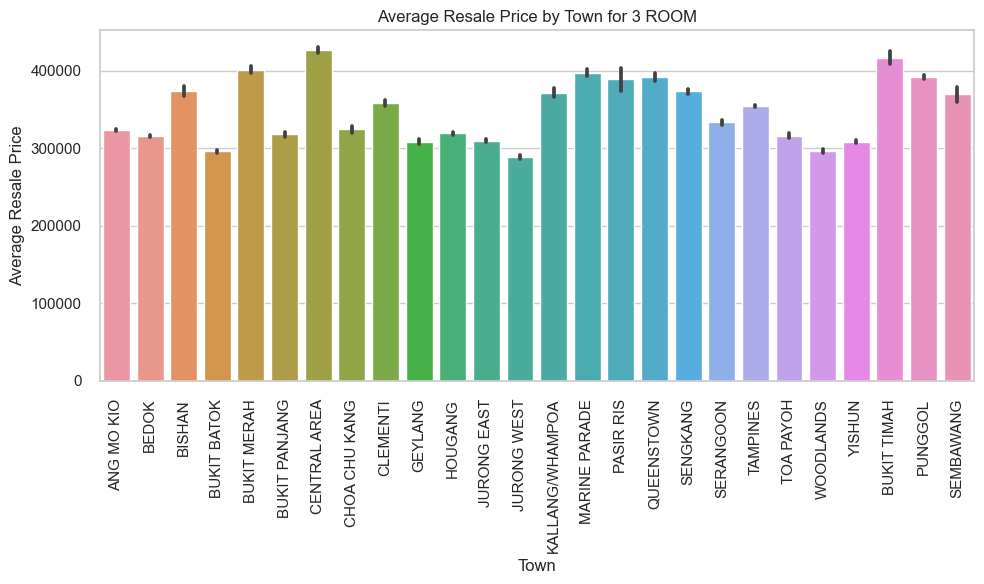

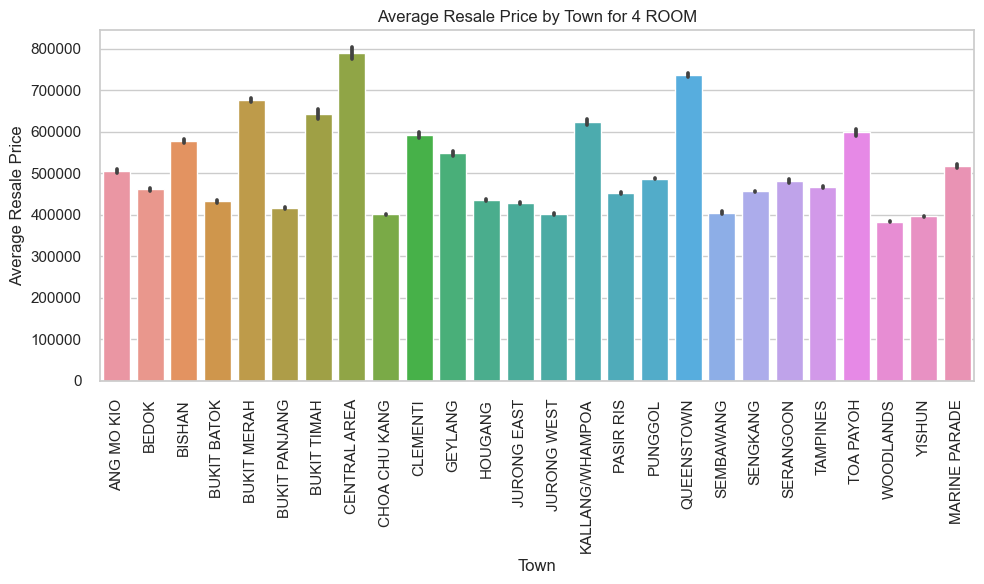

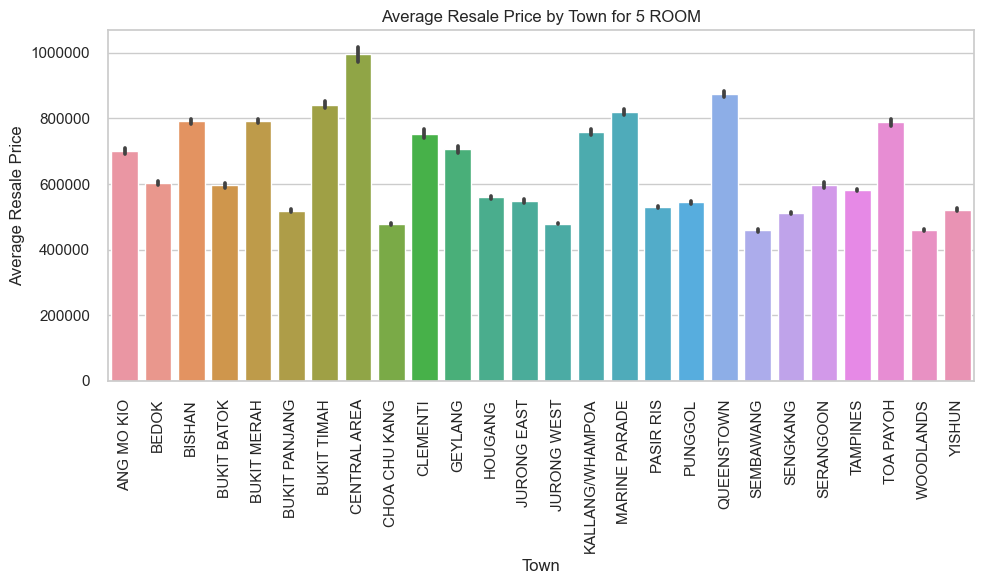

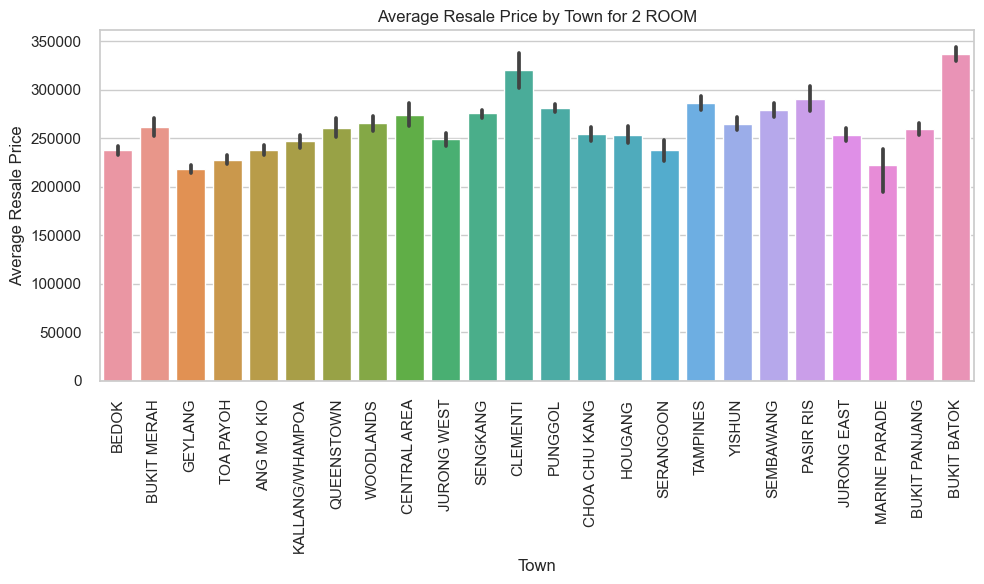

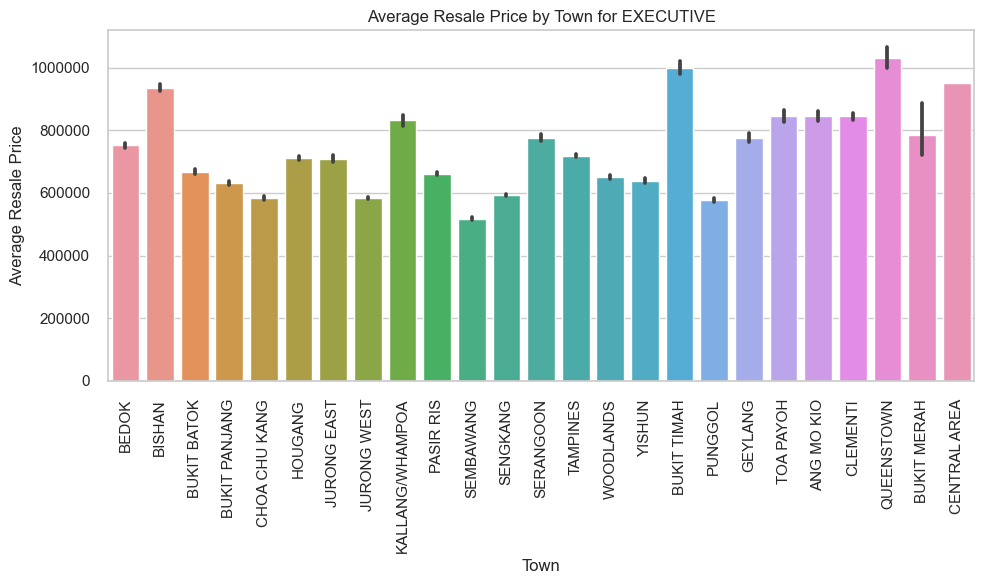

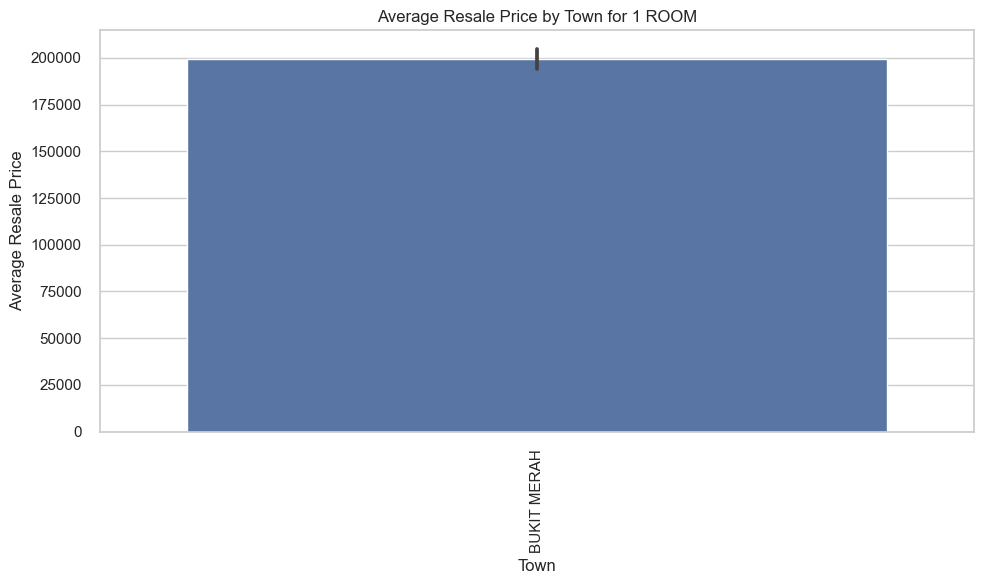

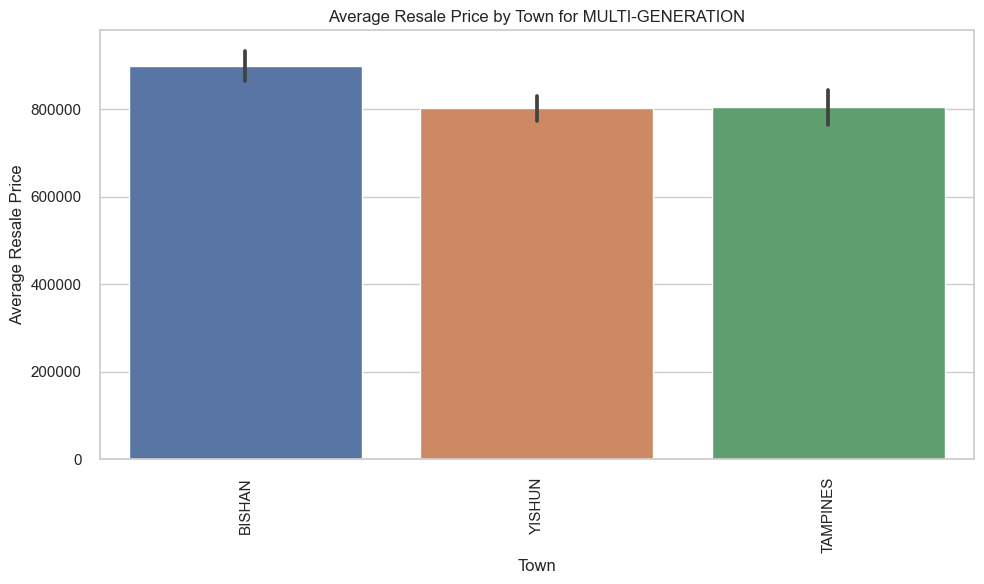

In [16]:
for flat_type, flat_type_df in flat_type_dfs.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='town', y='resale_price', data=flat_type_df)
    plt.title(f'Average Resale Price by Town for {flat_type}')
    plt.xticks(rotation=90)
    plt.xlabel('Town')
    plt.ylabel('Average Resale Price')
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()

# How about the distance from Central Business District (CBD) and MRT Station?

### Centreal Business District

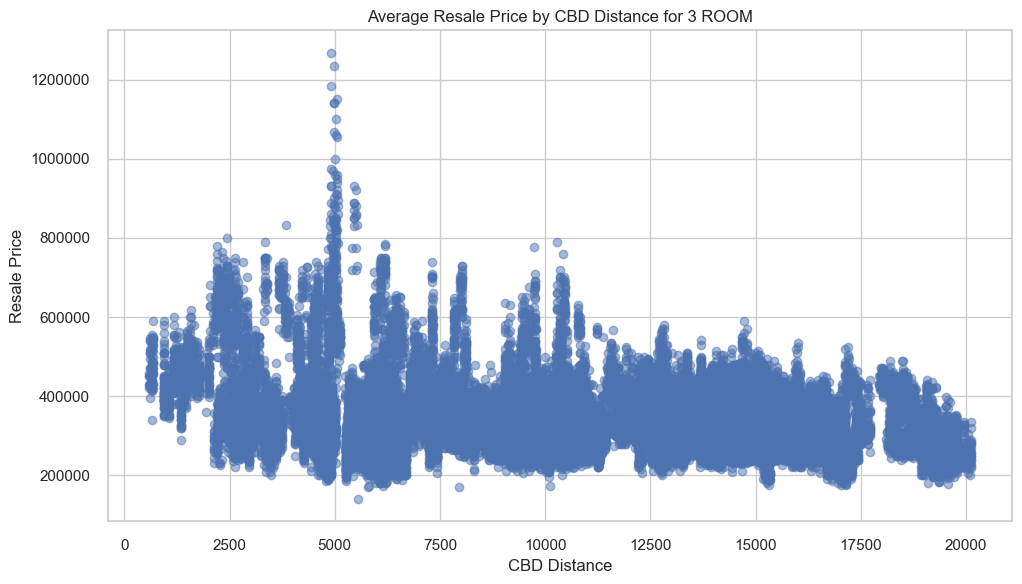

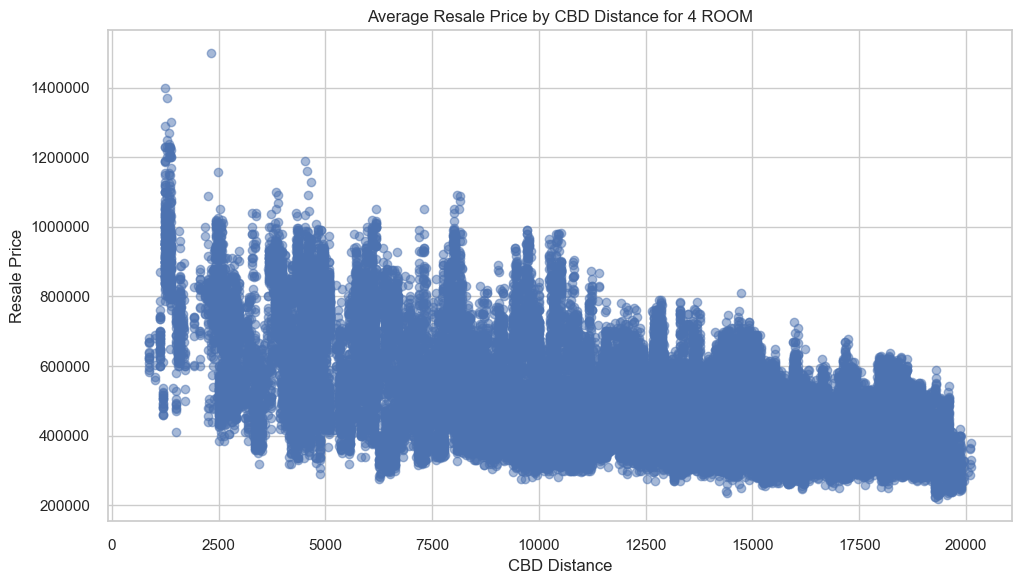

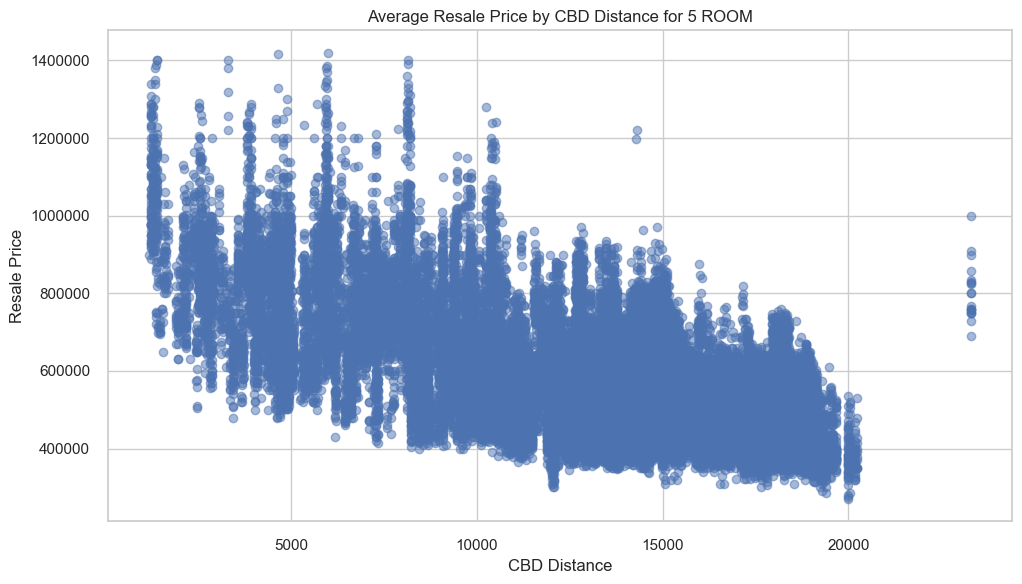

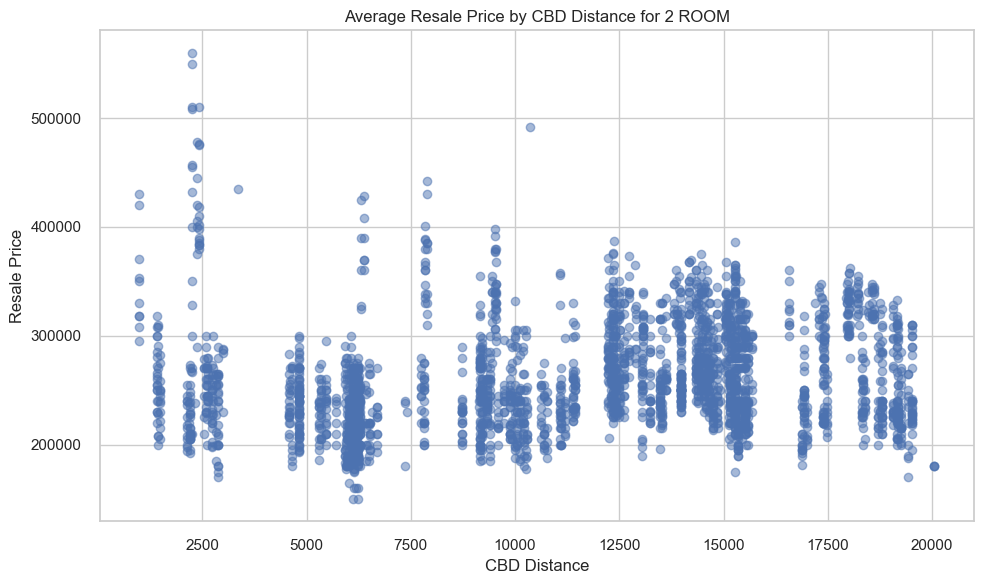

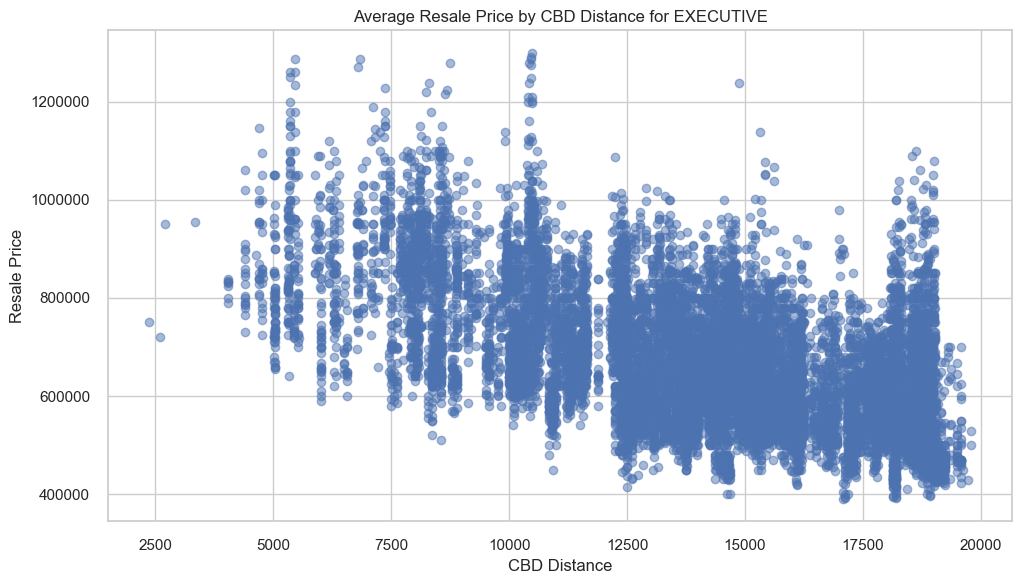

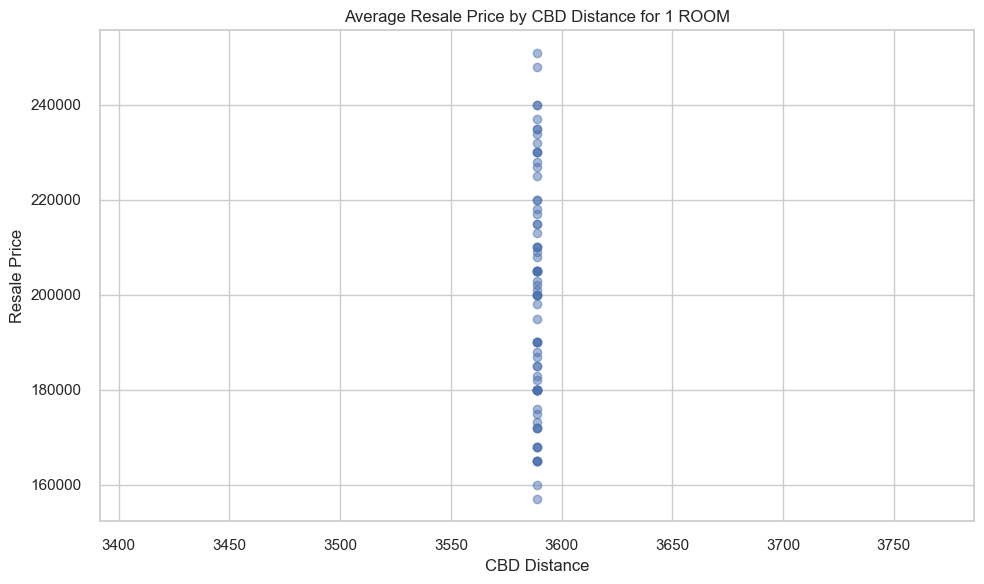

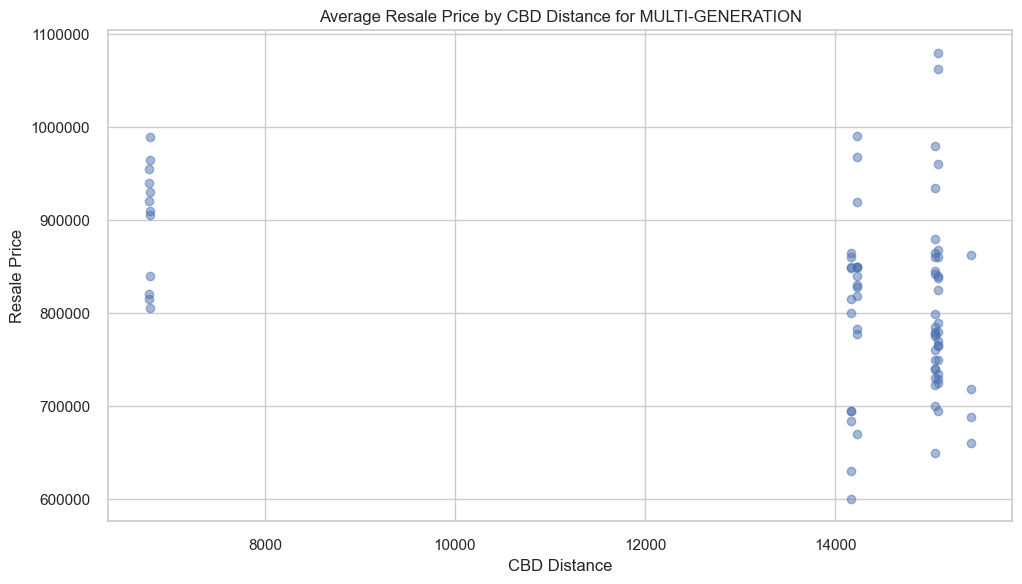

In [17]:
for flat_type, flat_type_df in flat_type_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(x='cbd_dist', y='resale_price',data=flat_type_df, alpha=0.5)
    plt.xlabel('CBD Distance')
    plt.ylabel('Resale Price')
    plt.title(f'Average Resale Price by CBD Distance for {flat_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

# We can see that there is some correlation between the CBD distance and the price, especially in 5 Room chart.

### Distance from MRT Stations

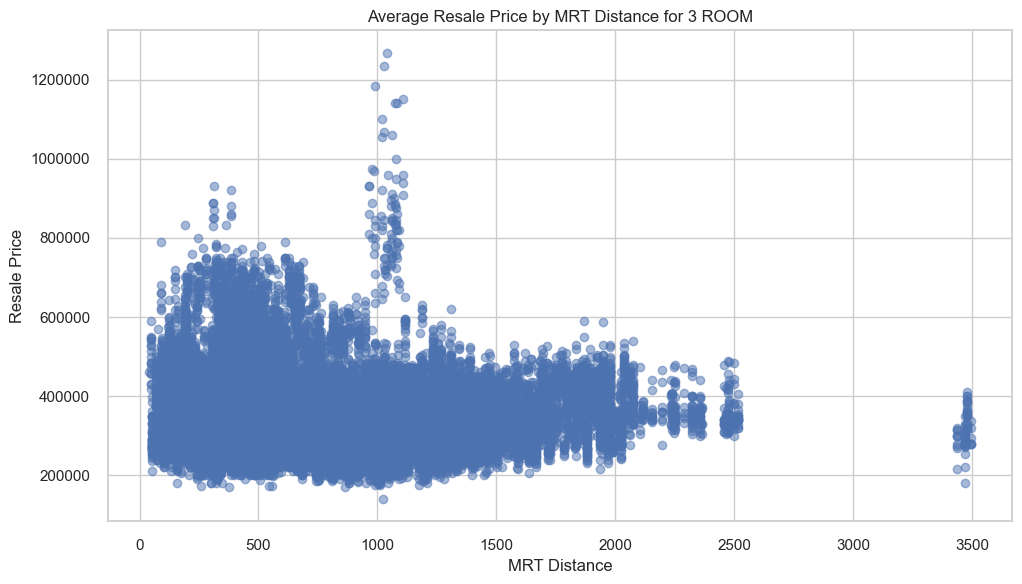

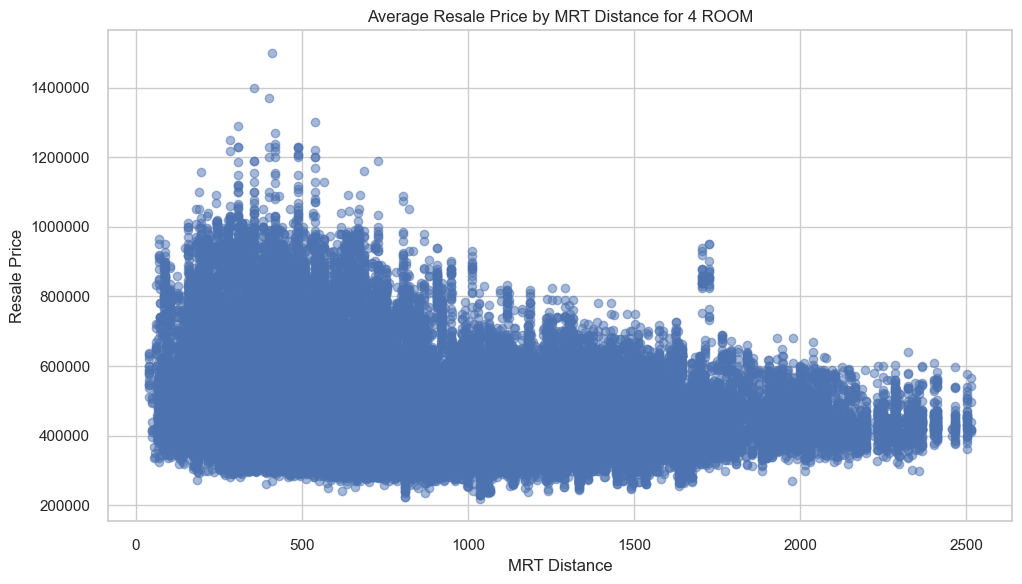

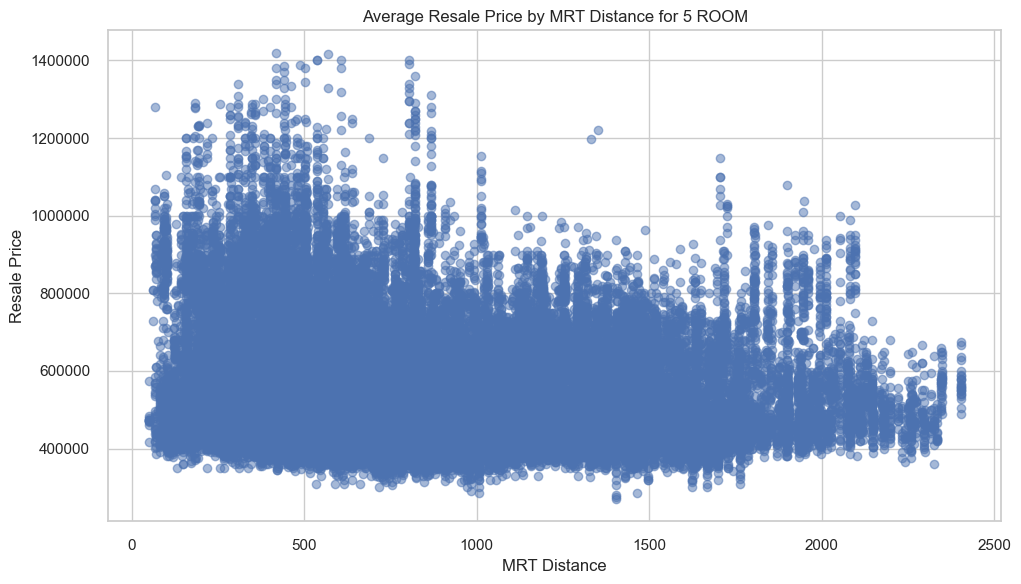

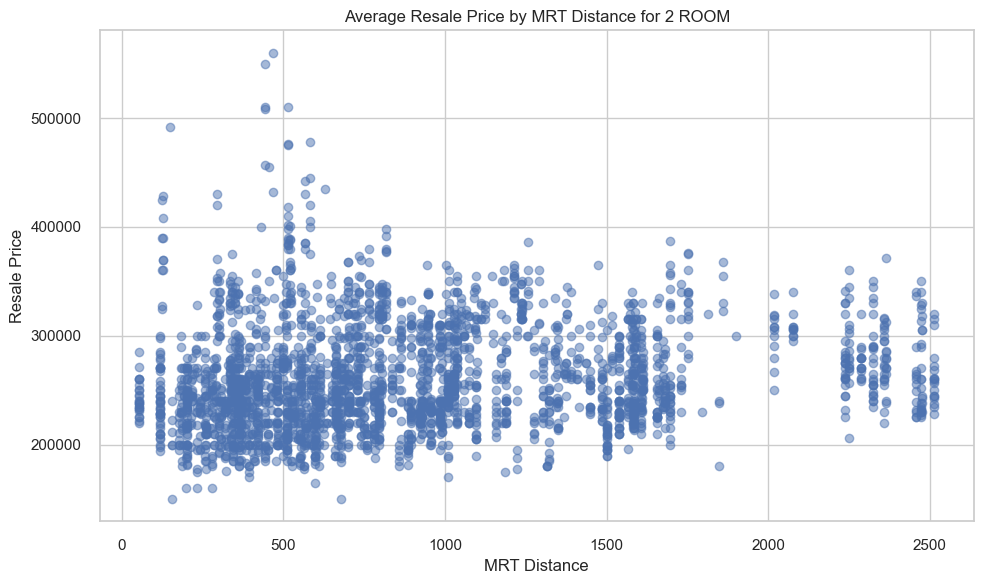

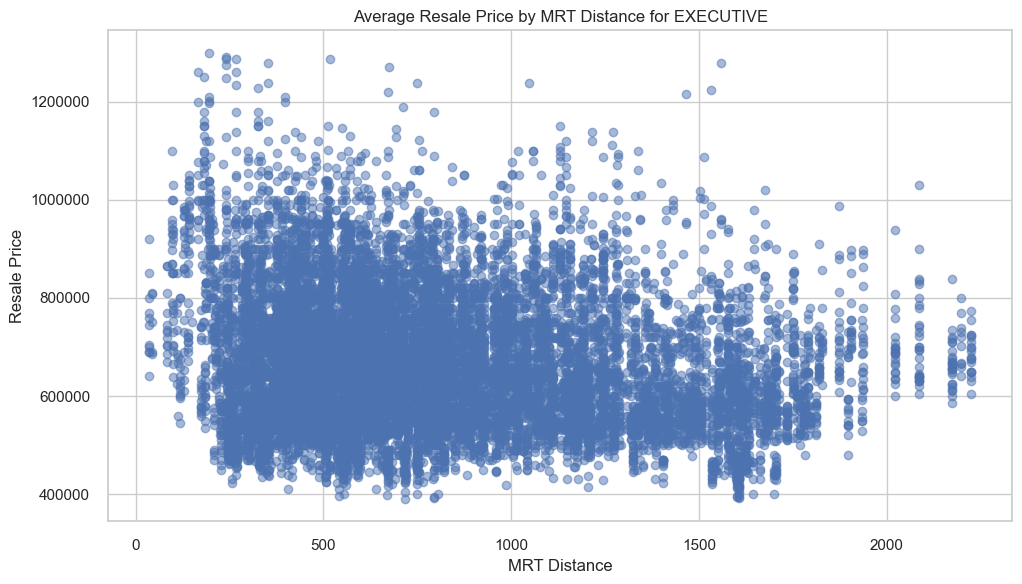

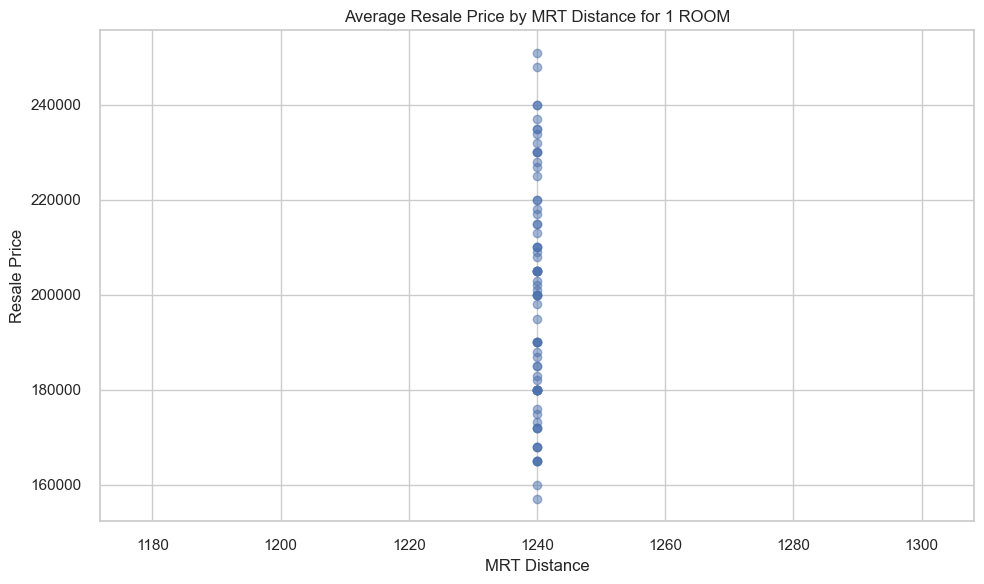

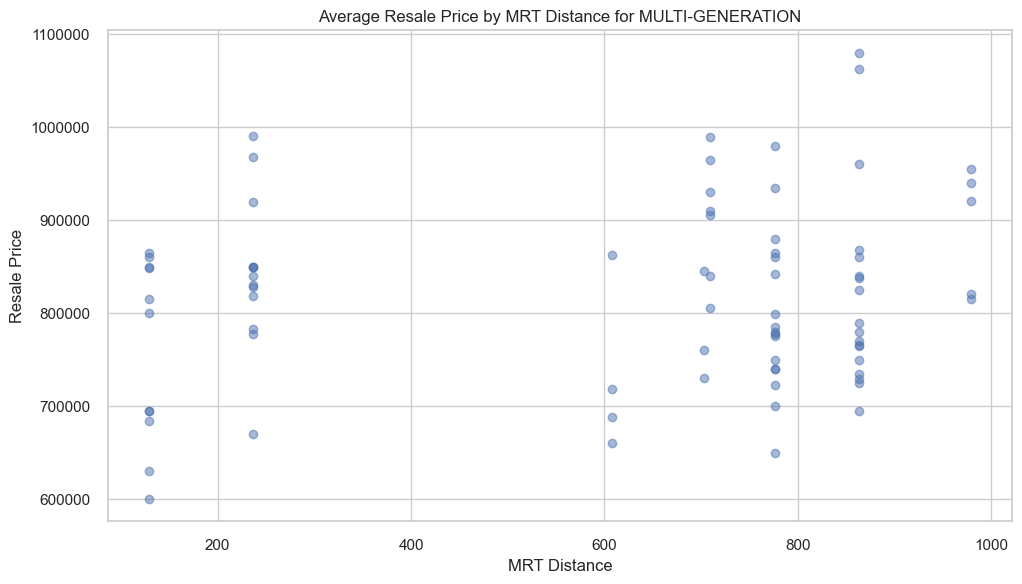

In [18]:
for flat_type, flat_type_df in flat_type_dfs.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(x='min_dist_mrt', y='resale_price',data=flat_type_df, alpha=0.5)
    plt.xlabel('MRT Distance')
    plt.ylabel('Resale Price')
    plt.title(f'Average Resale Price by MRT Distance for {flat_type}')
    plt.grid(True)
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

## As we can see from the charts, MRT Distance doesnt affect as much compared to CBD distance

# Data Cleaning and Preparation

#### Dropped town_flat as it was made for visuals above

In [19]:
data = data.drop("town_flat",axis=1)

#### Dropping latititude and longitude as 

In [20]:
data = data.drop("latitude",axis=1)
data = data.drop("longitude",axis=1)

#### Dropped street_name and block as we have town and postal code, and prevents mistyping of street names

In [21]:
data = data.drop("street_name",axis=1)
data = data.drop("block",axis=1)

# Saving for final dataset

In [22]:
# data.to_csv("/MLOPs-Assignment/data/final/01_hdb_resale_transactions.csv")

In [23]:
data

,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,cbd_dist,min_dist_mrt
0,ANG MO KIO,560174,2015-01,3 ROOM,07 TO 09,60.0,Improved,1986,255000.0,10296.855750,1096.947897
1,ANG MO KIO,560541,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1981,275000.0,10065.227930,847.235690
2,ANG MO KIO,560163,2015-01,3 ROOM,01 TO 03,69.0,New Generation,1980,285000.0,10118.831550,1176.742184
3,ANG MO KIO,560446,2015-01,3 ROOM,01 TO 03,68.0,New Generation,1979,290000.0,9383.300907,682.205473
4,ANG MO KIO,560557,2015-01,3 ROOM,07 TO 09,68.0,New Generation,1980,290000.0,9825.917255,953.047695
...,...,...,...,...,...,...,...,...,...,...,...
194235,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,18624.123340,702.591563
194236,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,18624.123340,702.591563
194237,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,18223.416060,727.108165
194238,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,11650.037860,1278.633561


# Setting up 

In [24]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")

In [25]:
from pycaret.regression import *

# Set up the data for regression
s = setup(data, target='resale_price',normalize= True, transform_target = True, log_experiment = True, experiment_name = "HBD-Resale-Prices")


,Description,Value
0,Session id,1429
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(194240, 11)"
4,Transformed data shape,"(194240, 53)"
5,Transformed train set shape,"(135968, 53)"
6,Transformed test set shape,"(58272, 53)"
7,Numeric features,5
8,Categorical features,5
9,Preprocess,True


In [ ]:
# compare all models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:16:51
Status,. . . . . . . . . . . . . . . . . .,Creating Logs
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,19965.5156,765126410.2206,27659.3157,0.9711,0.0560,0.0426,6.4610
rf,Random Forest Regressor,20466.0811,832865061.6434,28855.1214,0.9686,0.0587,0.0439,22.7340
et,Extra Trees Regressor,20967.0012,854056228.2468,29221.1452,0.9678,0.0610,0.0455,20.7980
xgboost,Extreme Gradient Boosting,21326.8865,877427852.8000,29618.7490,0.9669,0.0591,0.0452,5.6030
lightgbm,Light Gradient Boosting Machine,24225.4700,1147768772.6256,33877.6848,0.9567,0.0667,0.0510,1.1360
knn,K Neighbors Regressor,25514.8420,1409689574.4000,37543.0352,0.9468,0.0728,0.0537,2.5200
dt,Decision Tree Regressor,27800.5847,1572475200.2536,39650.7056,0.9407,0.0802,0.0596,1.1150
gbr,Gradient Boosting Regressor,33047.6949,2190858986.4609,46806.4154,0.9174,0.0888,0.0679,7.0430
br,Bayesian Ridge,41226.6445,3361665404.3368,57967.3157,0.8732,0.1117,0.0862,1.2420
ridge,Ridge Regression,41226.8403,3362398604.0615,57973.4900,0.8732,0.1117,0.0862,0.9390


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best.get_params()

In [ ]:
plot_model(best, plot = 'feature')


In [ ]:
evaluate_model(best)


In [ ]:
save_model(best, "Assignment")


In [ ]:
# !mlflow ui

# Consume the model

In [ ]:
# import mlflow
# logged_model = 'runs:/0b52d43ac6e4436494256ff663cccb7c/model'

# # Load model as a PyFuncModel.
# loaded_model = mlflow.pyfunc.load_model(logged_model)

# # Predict on a Pandas DataFrame.
# import pandas as pd
# loaded_model.predict(pd.DataFrame(data))

In [ ]:
# # print pipeline
# print(loaded_model)
# pipeline = loaded_model